<a href="https://colab.research.google.com/github/kishore862022/Codsoft_Task-3/blob/main/CODSOFT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam Detection**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sms = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])

In [ ]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
sms.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
sms['label'] = sms['label'].apply(lambda x: 1 if x == 'spam' else 0)
sms['label']=sms['label'].astype(int)

In [ ]:
# check duplications
sms.duplicated().sum(),sms.shape

(403, (5572, 2))

In [ ]:
#delete duplicated values
sms=sms.drop_duplicates(keep='first')
sms.shape

(5169, 2)

Data Analysis

In [ ]:
sms['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [ ]:
sms['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

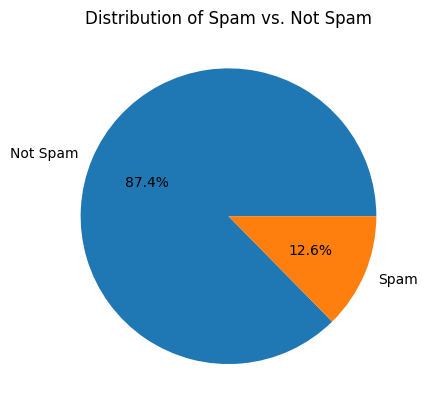

In [ ]:
plt.pie(sms['label'].value_counts(),labels=['Not Spam','Spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam vs. Not Spam')
plt.show()

Convert text to feature

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sms['num_char']=sms['message'].apply(len)
sms.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
sms['num_words']=sms['message'].apply(lambda x : len(word_tokenize(x)))
sms.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
sms['num_sent']=sms['message'].apply(lambda x : len(sent_tokenize(x)))
sms.head()

,label,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Data Analysis for Messages

In [ ]:
sms[['num_char','num_words','num_sent']]

,num_char,num_words,num_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [ ]:
sms[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# for spam message
sms[sms['label']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# for not spam message
sms[sms['label']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

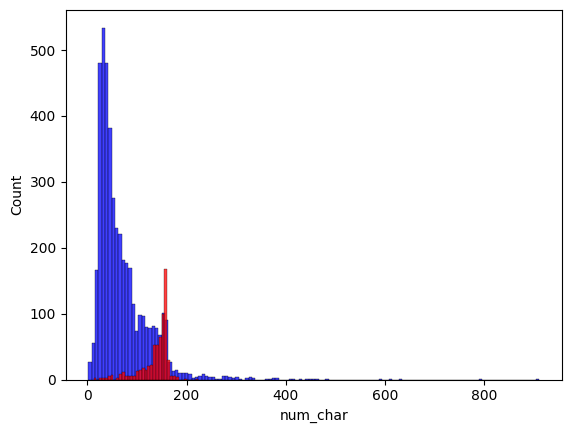

In [ ]:
import seaborn as sns
sns.histplot(sms[sms['label'] == 0]['num_char'], color='blue')
sns.histplot(sms[sms['label'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

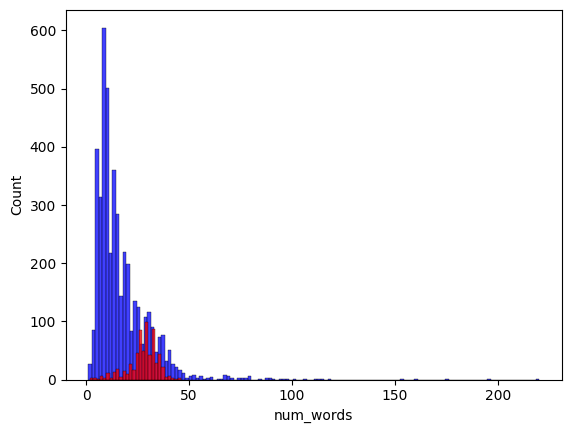

In [ ]:
import seaborn as sns
sns.histplot(sms[sms['label'] == 0]['num_words'], color='blue')
sns.histplot(sms[sms['label'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

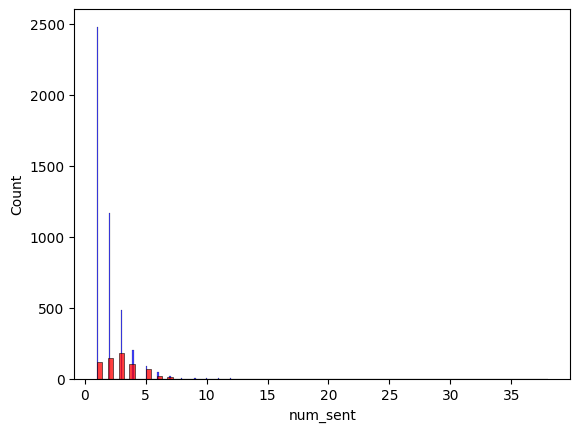

In [ ]:
import seaborn as sns
sns.histplot(sms[sms['label'] == 0]['num_sent'], color='blue')
sns.histplot(sms[sms['label'] == 1]['num_sent'], color='red')

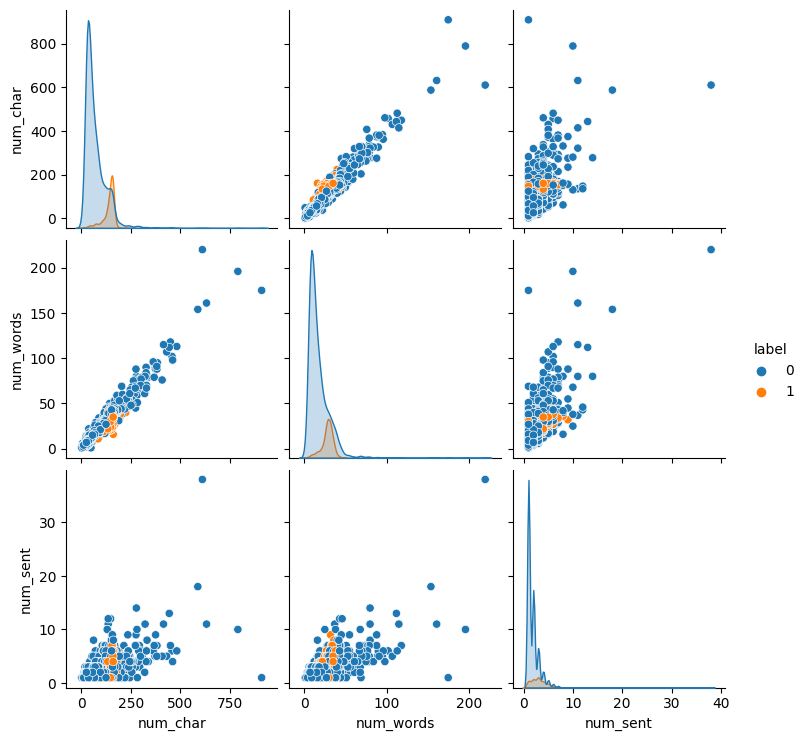

In [ ]:
sns.pairplot(sms,hue='label')

<Axes: >

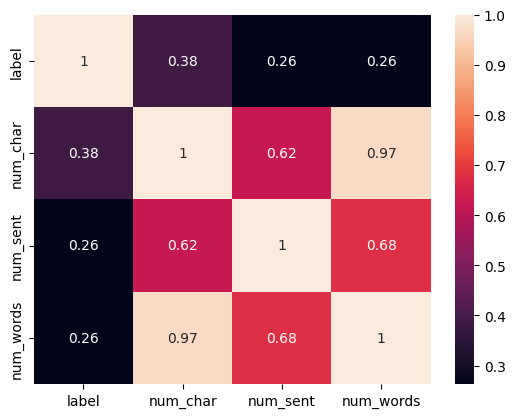

In [ ]:
sns.heatmap(sms[['label','num_char','num_sent','num_words']].corr(),annot=True)

In [ ]:
import re
from nltk.corpus import stopwords
import string
punctuation= string.punctuation
nltk.download('punkt')
#!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~



nltk.download('stopwords')
stop_words = stopwords.words('english')
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# going -> go  ,sleeps ->sleep



def text_transform(x):
  x=x.lower()
  x = nltk.word_tokenize(x)
  x=[word for word in x if (word not in stop_words) and (word.isalnum()) and (word not in punctuation)]
  x = [stemmer.stem(word) for word in x]

  return " ".join(x)


text_transform("HI HOW ARE YOU ? !,  he goes to sleep   ")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'hi goe sleep'

In [ ]:
(sms['message'][0])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
sms['text_transformed']=sms['message'].apply(text_transform)
sms.head()

,label,message,num_char,num_words,num_sent,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

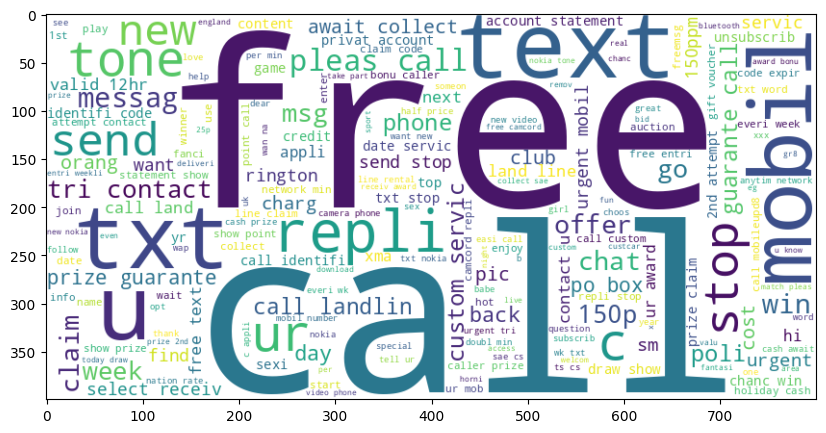

In [ ]:
#spam
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(

    (sms[sms['label']==1]['text_transformed']).str.cat(sep=" ")
)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

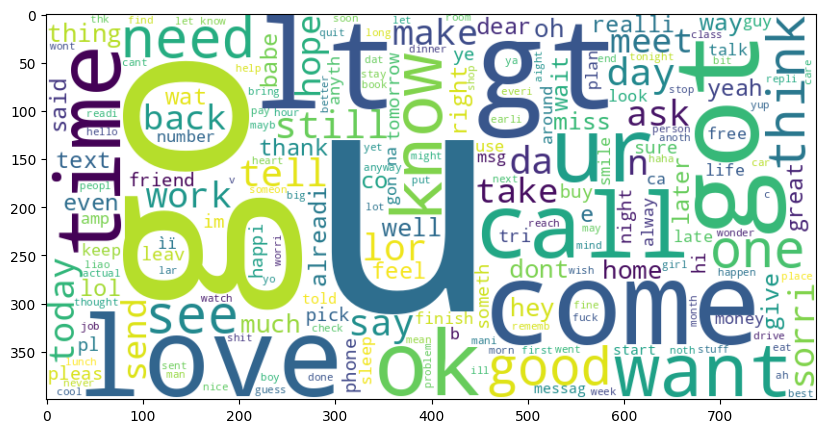

In [ ]:
#spam
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(

    (sms[sms['label']==0]['text_transformed']).str.cat(sep=" ")
)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()